# Plot convergence curves

In [1]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import scipy.stats as sp
import os

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from fatiando.vis import mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/home/leo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [3]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

In [4]:
mypath = 'data/real_obs_pts/tfa_inversion/multiple_int_min9_int_max15_z0_min-400_z0_max-200_r800_dz650_V20_L10Feb-15-2020/'

In [5]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

In [6]:
with open('data/model_real_obs_pts.pickle') as w:
        model = pickle.load(w)

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
for i, phi in enumerate(di['results']):
    plt.plot(phi[3], label='inversion%d' % (i+1))
plt.legend(loc=0, fontsize=2.5, shadow=bool, framealpha=1)

plt.savefig(mypath+'_tfa_convergence.png', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
z0 = di['z0']
intensity = di['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = di['x'].size

In [ ]:
matrix_gamma = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_gamma[i, j] = di['results'][i*n+j][3][-1]

In [ ]:
di['regularization']

In [ ]:
matrix_phi = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        matrix_phi[i, j] = np.linalg.norm(di['results'][i*n+j][6][-1], 2)**2./N

In [ ]:
fig, ax = fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,5)
w = 3
img = ax.imshow(matrix_gamma, vmin=0, vmax=2000, origin='lower',extent=[0,w,0,w])
img.axes.tick_params(labelsize=14)
plt.ylabel('$z_0$ (m)', fontsize=14)
plt.xlabel('$m_0$ (A/m)', fontsize=12)
plt.plot(1.5, 1.5, '^r', markersize=12)
plt.plot(1.75, 1.75, 'Dc', markersize=12, linewidth=2)
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
ax.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, w, n+1), minor=True);
ax.set_yticks(np.linspace(0, w, m+1), minor=True);
ax.grid(which='minor', color='k', linewidth=2)
clb = plt.colorbar(img, pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-285)
clb.ax.tick_params(labelsize=13)
plt.savefig(mypath+'complex_obj_func_map.png', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
fig, ax = fig, ax = plt.subplots(1,1)
fig.set_size_inches(6,5)
w = 3
img = ax.imshow(matrix_phi, vmin=0, vmax=2000, origin='lower',extent=[0,w,0,w])
img.axes.tick_params(labelsize=14)
plt.ylabel('$z_0$ (m)', fontsize=14)
plt.xlabel('$m_0$ (A/m)', fontsize=12)
x_label_list = []
y_label_list = []
for xl, yl in zip(intensity,z0):
    x_label_list.append(str(xl))
    y_label_list.append(str(yl)[:-2])
ax.set_xticks(np.linspace(w/(2.*n), w - w/(2.*n), n))
ax.set_yticks(np.linspace(w/(2.*m), w - w/(2.*m), m))
ax.set_xticklabels(x_label_list)
ax.set_yticklabels(y_label_list)
# Minor ticks
ax.set_xticks(np.linspace(0, w, n+1), minor=True);
ax.set_yticks(np.linspace(0, w, m+1), minor=True);
ax.grid(which='minor', color='k', linewidth=2)
clb = plt.colorbar(img, pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-285)
clb.ax.tick_params(labelsize=13)
plt.savefig(mypath+'complex_misfit_func_map.png', dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
di['regularization']

In [ ]:
mindex = np.argwhere(matrix_gamma<150.)
mindex

In [ ]:
for re in mindex:
    print re[0]*6 + re[1]
    print matrix_gamma[re[0], re[1]]

In [ ]:
misdex = np.argwhere(matrix_phi<100.)
misdex

In [ ]:
for re in misdex:
    print re[0]*6 + re[1]
    print matrix_phi[re[0], re[1]]

# Inversion 14

In [7]:
x = di['x']/1000.
y = di['y']/1000.
z = di['z']/1000.

for i in range(len(di['results'][14][2])):
    di['results'][14][2][i].x /= 1000.
    di['results'][14][2][i].y /= 1000.
    di['results'][14][2][i].z1 /= 1000.
    di['results'][14][2][i].z2 /= 1000.
    di['results'][14][4][0][i].x /= 1000.
    di['results'][14][4][0][i].y /= 1000.
    di['results'][14][4][0][i].z1 /= 1000.
    di['results'][14][4][0][i].z2 /= 1000.
    
for i in model['prisms']:
    i.x /= 1000.
    i.y /= 1000.
    i.z1 /= 1000.
    i.z2 /= 1000.

In [8]:
verts14 = mfun.plot_prisms(di['results'][14][2])
verts_initial14 = mfun.plot_prisms(di['results'][14][4][0])
verts_true = mfun.plot_prisms(model['prisms'])

/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/leo/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


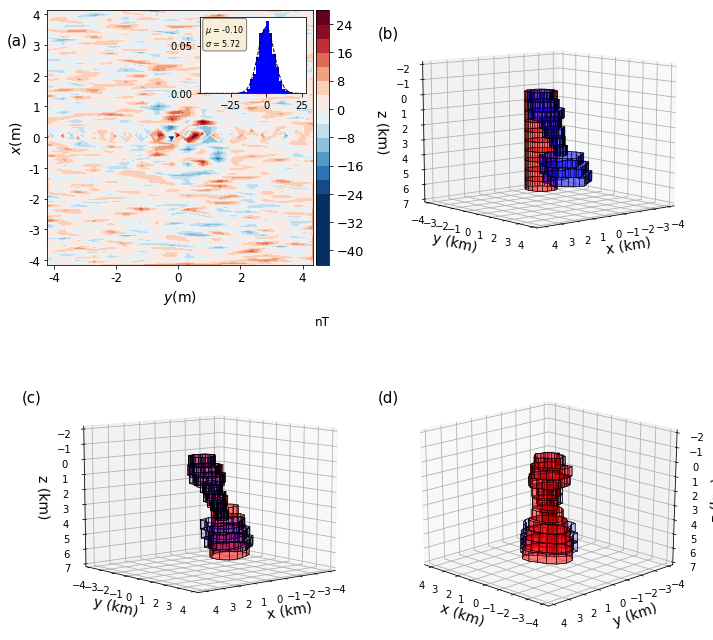

In [9]:
plt.figure(figsize=(10,9))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['results'][14][5], 20,
                cmap='RdBu_r', vmin=-np.max(di['results'][14][5]),
                vmax=np.max(di['results'][14][5])).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=14)
plt.ylabel('$x$(m)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][14][5])
std = np.std(di['results'][14][5])
nbins=30
n, bins, patches = plt.hist(di['results'][14][5],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.05, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=8,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(-5500, 3000, '(a)', fontsize= 15)

# initial- approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_initial14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(20, 135)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversion 21 (cyan diamond)

In [10]:
for i in range(len(di['results'][21][2])):
    di['results'][21][2][i].x /= 1000.
    di['results'][21][2][i].y /= 1000.
    di['results'][21][2][i].z1 /= 1000.
    di['results'][21][2][i].z2 /= 1000.
    di['results'][21][4][0][i].x /= 1000.
    di['results'][21][4][0][i].y /= 1000.
    di['results'][21][4][0][i].z1 /= 1000.
    di['results'][21][4][0][i].z2 /= 1000.

In [11]:
verts21 = mfun.plot_prisms(di['results'][21][2])
verts_initial21 = mfun.plot_prisms(di['results'][21][4][0])

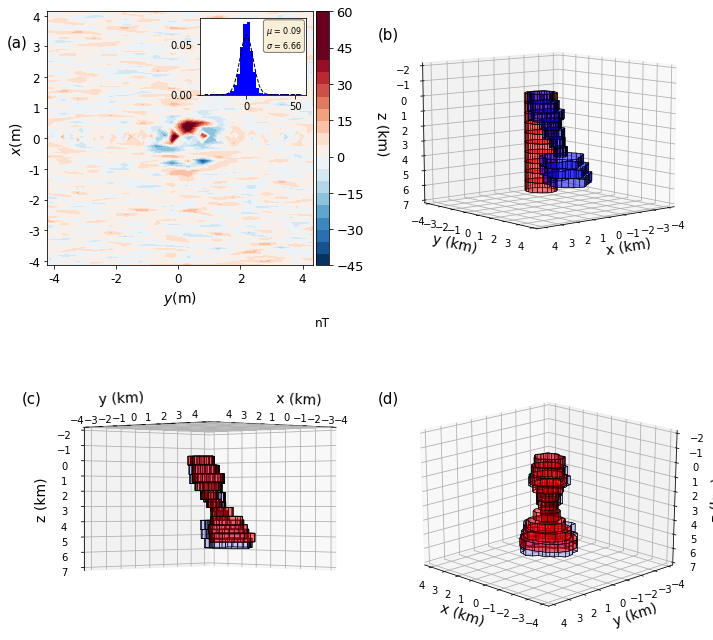

In [15]:
plt.figure(figsize=(10,9))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['results'][21][5], 20,
                cmap='RdBu_r', vmin=np.min(di['results'][21][5]),
                vmax=np.min(di['results'][21][5])*(-1)).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=14)
plt.ylabel('$x$(m)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][21][5])
std = np.std(di['results'][21][5])
nbins=30
n, bins, patches = plt.hist(di['results'][21][5],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.62, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=8,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(-5500, 3000, '(a)', fontsize= 15)
# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_initial21, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts21, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(0, 45)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts21, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(20, 135)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Inversions 14 and 21

In [ ]:
plt.figure(figsize=(10,9))

# initial approximate
ax = plt.subplot(2,2,1, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(0, 45)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts21, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(0, 45)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(20, 135)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts21, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(20, 135)
ax.text2D(-0.1, 0.1, '(d)', fontsize= 15)

plt.tight_layout()
#plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculating the momentum

In [ ]:
volume14 = mfun.volume_polygon(di['results'][14][2])
volume21 = mfun.volume_polygon(di['results'][21][2])
momentum14 = volume14*np.linalg.norm(di['results'][14][2][0].props['magnetization'])
momentum21 = volume21*np.linalg.norm(di['results'][21][2][0].props['magnetization'])


In [ ]:
volume14

In [ ]:
volume21

In [ ]:
momentum14

In [ ]:
momentum21

In [ ]:
di['results'][21][1][-1]

# Inversion 3

In [ ]:
model0, m0 = mfun.initial_cylinder(15, 10, -300., 300., -320., di['initial_dz'],
                      800., di['main_field'][0], di['main_field'][1],
                      di['main_field'][0], di['main_field'][1], 11.4)

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][14][3], 'b-', label='Objective value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [ ]:
x = di['x']/1000.
y = di['y']/1000.
z = di['z']/1000.

for i in range(len(di['results'][14][2])):
    di['results'][14][2][i].x /= 1000.
    di['results'][14][2][i].y /= 1000.
    di['results'][14][2][i].z1 /= 1000.
    di['results'][14][2][i].z2 /= 1000.
    model0[i].x /= 1000.
    model0[i].y /= 1000.
    model0[i].z1 /= 1000.
    model0[i].z2 /= 1000.
    
for i in model['prisms']:
    i.x /= 1000.
    i.y /= 1000.
    i.z1 /= 1000.
    i.z2 /= 1000.

In [ ]:
plt.figure(figsize=(10,9))
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][14][-2]), vmax=np.min(di['results'][14][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][14][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-305)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][14][-2])
std = np.std(di['results'][14][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][14][-2],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.7, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')


verts_initial = mfun.plot_prisms(model0)
    
verts_true = mfun.plot_prisms(model['prisms'])

verts5 = mfun.plot_prisms(di['results'][14][2])

ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.set_xticklabels(np.linspace(-3, 3, 7))
#ax.set_yticklabels(np.linspace(-3, 3, 7))
#ax.set_zticklabels(np.linspace(0, 2, 9))
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(10, 50)

ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts5, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.set_xticklabels(np.linspace(-3, 3, 7))
#ax.set_yticklabels(np.linspace(-3, 3, 7))
#ax.set_zticklabels(np.linspace(0, 2, 9))
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(10, 50)

ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts5, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.set_xticklabels(np.linspace(-4, 4, 5))
#ax.set_yticklabels(np.linspace(-3, 3, 7))
#ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=8
ax.zaxis.labelpad=8
ax.xaxis.labelpad=8
ax.view_init(20, 135)

#ax.autoscale_view()
plt.tight_layout()

plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')

plt.show()

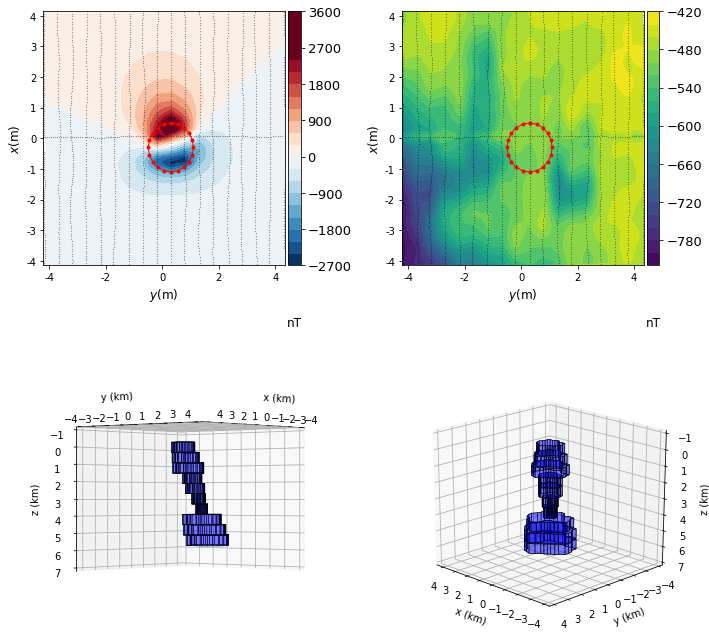

In [13]:
plt.figure(figsize=(10,9))
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['observed_data'], 20,
                cmap='RdBu_r', vmin=np.min(di['observed_data']),
                vmax=-np.min(di['observed_data'])).ax.tick_params(labelsize=10)
estimate = mpl.polygon(di['results'][0][4][0][0], '.-r', xy2ne=True)
plt.xlabel('$y$(m)', fontsize=12)
plt.ylabel('$x$(m)', fontsize=12)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(di['y'], di['x'], 'k.', markersize=.3, label='Gaussian')

# plot topography
ax=plt.subplot(2,2,2)
#plt.title('Residual', fontsize=20)
plt.tricontourf(di['y'], di['x'], di['z'], 20,
                cmap='viridis').ax.tick_params(labelsize=10)
estimate = mpl.polygon(di['results'][0][4][0][0], '.-r', xy2ne=True)
plt.xlabel('$y$(m)', fontsize=12)
plt.ylabel('$x$(m)', fontsize=12)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(di['y'], di['x'], 'k.', markersize=.3, label='Gaussian')

# initial approximate
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
#ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
# facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(0, 40)

# inverse model view 1
ax = plt.subplot(2,2,4, projection='3d')

#plot sides
#ax.add_collection3d(Poly3DCollection(verts, alpha=0.3, 
#facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 10)
ax.set_xlabel('x (km)', fontsize= 10)
ax.set_zlabel('z (km)', fontsize= 10)
#ax.yaxis.labelpad=8
#ax.zaxis.labelpad=8
#ax.xaxis.labelpad=8
ax.view_init(20, 135)

plt.tight_layout()

plt.savefig(mypath+'model_data.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
di['z']

# Inversion 6

In [ ]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][22][-2]), vmax=np.min(di['results'][22][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][22][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][22][-2])
std = np.std(di['results'][22][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][22][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
plt.show()

In [ ]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][22][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [ ]:
x = di['x']/1000.
y = di['y']/1000.
z = di['z']/1000.

for i in range(len(di['results'][22][2])):
    di['results'][22][2][i].x /= 1000.
    di['results'][22][2][i].y /= 1000.
    di['results'][22][2][i].z1 /= 1000.
    di['results'][22][2][i].z2 /= 1000.
    

In [ ]:
verts6 = mfun.plot_prisms(di['results'][22][2])

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts6, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_ylim(np.min(x), np.max(x), 100)
ax.set_xlim(np.min(y), np.max(y), 100)
ax.set_zlim(5, -2, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_ylabel('Y (km)', fontsize= 17)
ax.set_xlabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
#ax.set_xticklabels(np.linspace(-3, 3, 7))
#ax.set_yticklabels(np.linspace(-3, 3, 7))
#ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(10, 120)
ax.autoscale_view()

plt.show()

In [ ]:
di['regularization']

In [ ]:
np.linalg.norm(di['results'][6][2][0].props['magnetization'])

In [ ]:
di['results'][6][2][0].z1